# Proyecto Final Samsung Inovation Campus
---

## Importación de librerias

In [12]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Preparacion de la data

### Separacion 

In [13]:
original_df = pd.read_csv('water_potability.csv')

# Extraccion los últimos 300 registros
records = original_df.tail(300)

# Nuevo DataFrame con los ultimos 300 registros
testing_df = records.copy()

# Eliminacion los últimos 300 registros del DataFrame de entrenamiento
training_df = original_df.drop(original_df.tail(300).index)


### Limpieza

In [14]:
#Reemplazo de valores nulos (usando el promedio de la columna)
#En valores de entrenamiento
training_df.fillna(training_df.mean(),inplace=True)
#En valores de prueba
testing_df.fillna(testing_df.mean(),inplace=True)

# Guardado de DataFrames
testing_df.to_csv('Test Records.csv', index=False)
training_df.to_csv('Training Records.csv', index=False)

### Ordenado para entrenamiento

In [15]:
#Separacion de Entradas y Salidas para entranamiento
inp= training_df[['ph', 'Hardness', 'Solids','Chloramines','Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']].to_numpy()
out= training_df[['Potability']].to_numpy()

#Escalado de datos
scaler = StandardScaler()
inp_training_scaled = scaler.fit_transform(inp)

## Red Neuronal

### Modelos

#### Modelo #1

In [6]:
hidden_layer1 = tf.keras.layers.Dense(units=3, input_shape=[9], activation='relu')
hidden_layer2 = tf.keras.layers.Dense(units=3, activation='relu')
output = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = tf.keras.Sequential([hidden_layer1,hidden_layer2,output])

c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Modelo #2

In [33]:
hidden_layer1 = tf.keras.layers.Dense(units=32, input_shape=[9], activation='relu')
hidden_layer2 = tf.keras.layers.Dense(units=16, activation='relu')
hidden_layer3 = tf.keras.layers.Dense(units=8, activation='relu')
output = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = tf.keras.Sequential([hidden_layer1, hidden_layer2, hidden_layer3, output])

c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Modelo #3

In [16]:
hidden_layer1 = tf.keras.layers.Dense(units=32, input_shape=[9], activation='leaky_relu')
batch_norm1 = tf.keras.layers.BatchNormalization() # Normalizacion layer
dropout1 = tf.keras.layers.Dropout(0.3)
hidden_layer2 = tf.keras.layers.Dense(units=20, activation='leaky_relu')
batch_norm2 = tf.keras.layers.BatchNormalization()
dropout2 = tf.keras.layers.Dropout(0.2)
hidden_layer3 = tf.keras.layers.Dense(units=15, activation='leaky_relu')
batch_norm3 = tf.keras.layers.BatchNormalization()
output = tf.keras.layers.Dense(units=1, activation='sigmoid')

model = tf.keras.Sequential([hidden_layer1,batch_norm1,dropout1, hidden_layer2,batch_norm2,dropout2, hidden_layer3,batch_norm3, output])


c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilación y Entrenamiento del Modelo

#### Compilación

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Entrenamiento

In [21]:
print("Entrenando...")
#Callback para detencion en caso de que el modelo deje de aprender
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=250, restore_best_weights=True)
#Callback para ajustar automaticamente el modelo y evitar los falsos suelos
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=150, min_lr=0.0001)
#Callback para guardar el mejor modelo
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

historial = model.fit(inp_training_scaled, out, epochs=2000, verbose=0, validation_split=0.02, callbacks= [early_stopping, model_checkpoint])
print("Entrenado")

Entrenando...
Entrenado


### Métricas

#### Entrenamiento #1

Claves del historial: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Último valor de pérdida: 0.5965222120285034
Último valor de exactitud: 0.6831275820732117


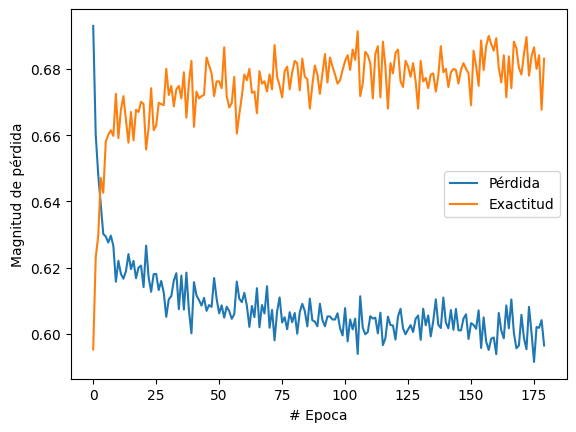

In [19]:
#Obtencion de valores de Precición y Perdida
print("Claves del historial:", historial.history.keys())
loss_values = historial.history['loss']
accuracy_values = historial.history['accuracy']
print("Último valor de pérdida:", loss_values[-1])
print("Último valor de exactitud:", accuracy_values[-1])

#Vista grafica de los Valores
plt.figure()
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"], label='Pérdida')
plt.plot(historial.history["accuracy"], label='Exactitud')
plt.legend()
plt.show()

#### Entrenamiento 2

Claves del historial: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Último valor de pérdida: 0.5933495163917542
Último valor de exactitud: 0.6903291940689087


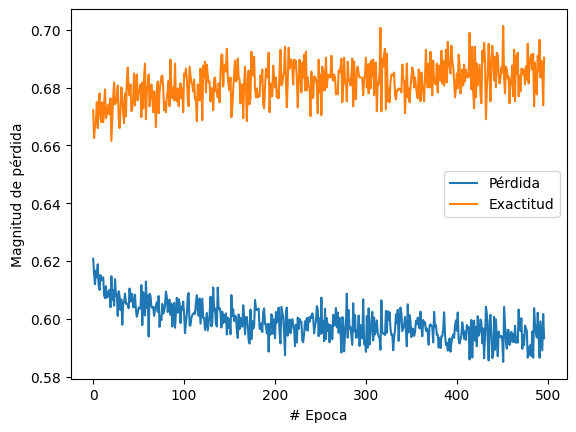

In [22]:
#Obtencion de valores de Precición y Perdida
print("Claves del historial:", historial.history.keys())
loss_values = historial.history['loss']
accuracy_values = historial.history['accuracy']
print("Último valor de pérdida:", loss_values[-1])
print("Último valor de exactitud:", accuracy_values[-1])

#Vista grafica de los Valores
plt.figure()
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"], label='Pérdida')
plt.plot(historial.history["accuracy"], label='Exactitud')
plt.legend()
plt.show()

#### Entrenamiento 3

Claves del historial: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
Último valor de pérdida: 0.4741353988647461
Último valor de exactitud: 0.7856652736663818


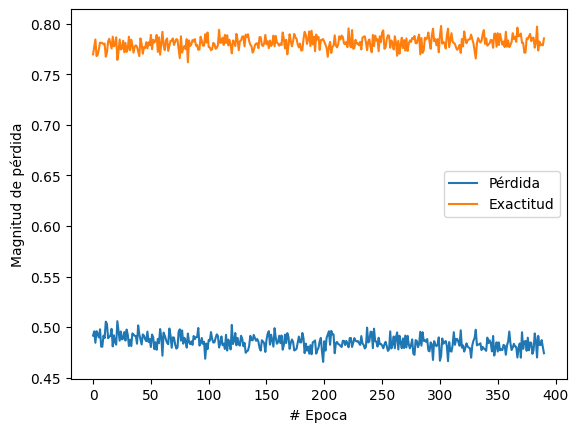

In [18]:
#Obtencion de valores de Precición y Perdida
print("Claves del historial:", historial.history.keys())
loss_values = historial.history['loss']
accuracy_values = historial.history['accuracy']
print("Último valor de pérdida:", loss_values[-1])
print("Último valor de exactitud:", accuracy_values[-1])

#Vista grafica de los Valores
plt.figure()
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"], label='Pérdida')
plt.plot(historial.history["accuracy"], label='Exactitud')
plt.legend()
plt.show()

### Predicción de Prueba

In [23]:
#Datos de Prueba
print("Predicción")
#720 (Control) - Salida 1
dato0 = [7.417502636689077,198.70565298813403,24389.36288513361,4.790681389223984,289.3313577693062,366.3707236475444,18.415180455004304,87.99622277162433,3.3912406668716133] 
#2867 - Salida 1
dato1 = [1.130768886836288,266.7449592274032,9929.194809860886,6.011964238184745,352.1532144022425,542.8067817707314,10.974207361682431,65.782453044405,4.771443754534465] 
#2869 - Salida 1
dato2 = [7.1252110755305536,209.7467711974657,16701.56597534472,7.458741450053704,320.50094487053195,404.7045963253844,18.9527967341603,92.34737526315509,3.9080753459125]
#2871 - Salida 0
dato3 = [7.171924088146052,254.1253887500646,9959.1350153987,4.008584109643412,335.56910231011415,364.8062731549298,11.316645280298758,59.35322110637468,3.170543086971916]

input_data = np.array([dato0,dato1,dato2,dato3])

# Escalado de entradas
input_data_scaled = scaler.transform(input_data) 

# Predicción
resultado = model.predict(input_data_scaled)
resultado_entero = (resultado>=0.5).astype(int)
print (resultado_entero)

resultado_flotante = resultado.astype(float)
print (resultado_flotante)

Predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0]
 [1]
 [0]
 [0]]
[[0.41120771]
 [0.95052761]
 [0.29152375]
 [0.31484199]]


### Exportación del Modelo

In [24]:
model.save("Water_Model.keras")